<img src="images/logoitam.gif">

# Maestría en Ciencia de Datos
## Regresión Lineal 

* Machine Learning | Tarea 03 | 01 de septiembre de 2016 |
* Alumna: Gabriela Flores Bracamontes |  Clave: 160124 |

## Actividades
* Haga una regresión lineal utilizando los datos provistos por el profesor (reglin)
    - Utilize sklearn (LinearRegression) y el ipython Notebook
    - Siga el procedimiento para generar modelos delineado por el profesor en clase
    - Grafique los datos y el resultado del modelo
    - Grafique como cambia el error con el valor de los pesos W
        + Para diferentes valores de W calcule el error del modelo y grafique. 
        + Dónde quedan las W encontradas por sklearn


## Bibliografía
* http://blog.kaggle.com/2015/05/28/scikit-learn-video-6-linear-regression-plus-pandas-seaborn/

## Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math as mth
%matplotlib inline


## 1.- Cargo los datos

In [2]:
datos = pd.read_csv("regLin.csv")
datos

,X,y
0,35.657897,28.074403
1,48.685931,36.674434
2,95.861773,67.903577
3,25.997253,11.931727
4,49.964772,30.286144
5,55.003337,44.274354
6,78.375881,49.032737
7,15.286028,13.862727
8,81.066092,55.742546
9,35.059204,30.345383


In [3]:
datos.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


## 2.- Divido los datos en entrenamiento(.75) y pruebas(.25)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(datos[["X"]], datos[["y"]], train_size=0.75)

In [5]:
Y_test

,y
357,40.396901
358,23.191621
385,43.366335
715,44.170689
398,51.828399
634,52.991486
841,8.209886
833,64.639431
901,46.755406
393,1.261628


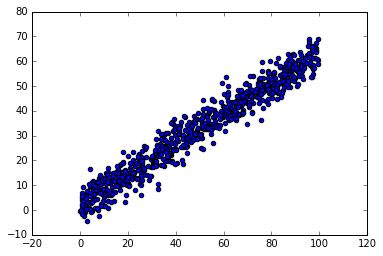

In [6]:
plt.scatter(X_train,Y_train)

## 3.- Elijo el modelo de Regresión Lineal y lo entreno

In [7]:
lr = LinearRegression()
modelo = lr.fit(X_train,Y_train)

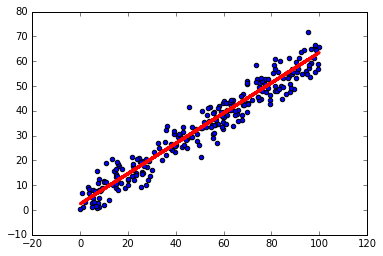

In [8]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, lr.predict(X_test), color='red', linewidth=3)

In [9]:
modelo.intercept_ #w0

array([ 2.45941408])

In [10]:
modelo.coef_ #w1

array([[ 0.61016567]])

## 4.- Para diferentes valores de W calcule el error del modelo y grafique

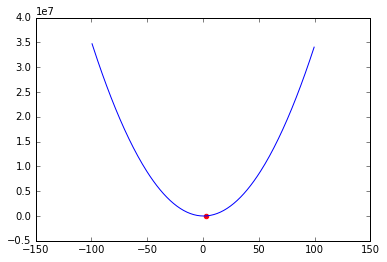

In [11]:
w0 = lr.intercept_[0]
w1 = lr.coef_[0][0]

W=range(-100,100,1) + w1
#print(W)
error =[]
for i in W:
    y_pred = i*X_test + w0
    C= np.subtract(y_pred, Y_test)
    C= C**2
    error.append(np.mean(C))

plt.plot(W,error)
plt.scatter(w0,np.mean(((w1*datos['X'] + w0 )-datos['y'])**2),color="red")

In [12]:
W

array([-99.38983433, -98.38983433, -97.38983433, -96.38983433,
       -95.38983433, -94.38983433, -93.38983433, -92.38983433,
       -91.38983433, -90.38983433, -89.38983433, -88.38983433,
       -87.38983433, -86.38983433, -85.38983433, -84.38983433,
       -83.38983433, -82.38983433, -81.38983433, -80.38983433,
       -79.38983433, -78.38983433, -77.38983433, -76.38983433,
       -75.38983433, -74.38983433, -73.38983433, -72.38983433,
       -71.38983433, -70.38983433, -69.38983433, -68.38983433,
       -67.38983433, -66.38983433, -65.38983433, -64.38983433,
       -63.38983433, -62.38983433, -61.38983433, -60.38983433,
       -59.38983433, -58.38983433, -57.38983433, -56.38983433,
       -55.38983433, -54.38983433, -53.38983433, -52.38983433,
       -51.38983433, -50.38983433, -49.38983433, -48.38983433,
       -47.38983433, -46.38983433, -45.38983433, -44.38983433,
       -43.38983433, -42.38983433, -41.38983433, -40.38983433,
       -39.38983433, -38.38983433, -37.38983433, -36.38

## Para el archivo 2

In [13]:
datos2 = pd.read_csv("regLin2.csv")
datos2.describe()

,X,y
count,1029.000000,1029.000000
mean,50.757989,2137.739358
std,29.708336,1870.369352
min,0.230225,0.272241
25%,22.870956,342.135840
50%,53.951080,1774.199681
75%,76.256816,3658.103897
max,99.831593,7133.608688


In [14]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(datos2[["X"]], datos2[["y"]], train_size=0.75)
lr2 = LinearRegression()

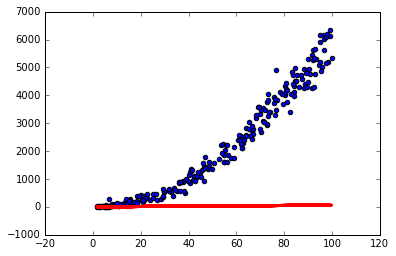

In [15]:
plt.scatter(X2_test,Y2_test)
plt.plot(X2_test, lr.predict(X2_test), color='red', linewidth=3)

## Ahora transformamos los datos en un espacio donde si los podemos tratar

In [16]:
X2_trans=[[i+i**2] for i in X2_train['X']]
lr2.fit(X2_trans, Y2_train)
x=np.linspace(0,100,100)

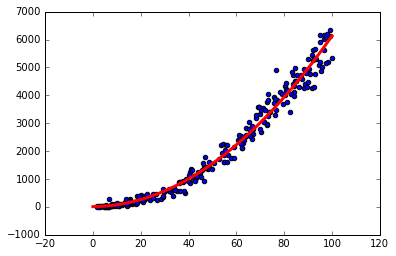

In [17]:
plt.scatter(X2_test, Y2_test)
plt.plot(x, lr2.predict([[i+i**2] for i in x]), color='red', linewidth=3)

In [18]:
datos3 = pd.read_csv("regLin3.csv")
datos3.describe()

,X,y
count,1029.000000,1029.000000
mean,50.163569,-0.024165
std,29.403168,0.701349
min,0.083795,-1.000000
25%,24.059073,-0.727235
50%,50.102445,-0.003449
75%,75.384381,0.665711
max,99.997174,0.999984


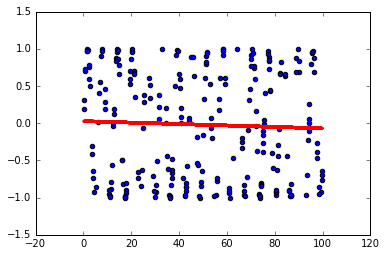

In [19]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(datos3[["X"]], datos3[["y"]], train_size=0.75)
lr3 = LinearRegression()
modelo3 = lr3.fit(X3_train,Y3_train)
plt.scatter(X3_test,Y3_test)
plt.plot(X3_test, lr3.predict(X3_test), color='red', linewidth=3)

## Ahora transformamos los datos en un espacio donde si los podemos tratar

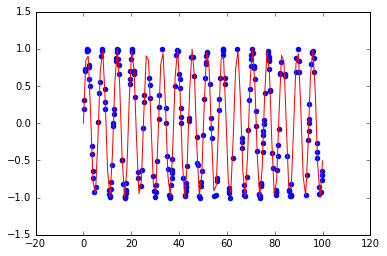

In [20]:
lr3.fit([[mth.sin(i)] for i in X3_train['X']], Y3_train)
plt.scatter(X3_test, Y3_test,  color='blue')
x=np.linspace(0,100,100)
xt=[[mth.sin(i)] for i in x]
plt.plot(x, lr3.predict(xt), color='red', linewidth=1)
